In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

/Users/amacdon/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
read_color = sns.color_palette()[0]
write_color = sns.color_palette()[1]

/Users/amacdon/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
results_dir = 'results'

In [4]:
def get_write_results(results_run, label_suffix = ''):
    write_labels = []
    write_results = {}

    labels = [
        'SciDB initial load' + label_suffix,
        'SciDB first update (last 10 values)' + label_suffix,
        'SciDB second update (first 10 values)' + label_suffix,
        'SciDB third update (entire series)' + label_suffix,
        'SciDB fourth update (entire series)' + label_suffix,
        
        'PhilDB initial load' + label_suffix,
        'PhilDB first update (last 10 values)' + label_suffix,
        'PhilDB second update (first 10 values)' + label_suffix,
        'PhilDB third update (entire series)' + label_suffix,
        'PhilDB fourth update (entire series)' + label_suffix
    ]

    result_files = [
        np.loadtxt(os.path.join(results_run, 'scidb_initial_writes.txt')),
        np.loadtxt(os.path.join(results_run, 'scidb_update1_writes.txt')),
        np.loadtxt(os.path.join(results_run, 'scidb_update2_writes.txt')),
        np.loadtxt(os.path.join(results_run, 'scidb_update3_writes.txt')),
        np.loadtxt(os.path.join(results_run, 'scidb_update4_writes.txt')),
        
        np.loadtxt(os.path.join(results_run, 'phildb_initial_writes.txt')),
        np.loadtxt(os.path.join(results_run, 'phildb_update1_writes.txt')),
        np.loadtxt(os.path.join(results_run, 'phildb_update2_writes.txt')),
        np.loadtxt(os.path.join(results_run, 'phildb_update3_writes.txt')),
        np.loadtxt(os.path.join(results_run, 'phildb_update4_writes.txt'))
    ]

    for db, wtimes in zip(labels, result_files):
        write_results[db] = wtimes
        
    write_labels += labels
    
    writes = pd.DataFrame(write_results) * 1000
    writes = writes[write_labels]
    
    return writes, write_labels

writes = {}
write_labels = {}
for run in ['A', 'B', 'C', 'D']:
    results_run = '{0}/{1}'.format(results_dir, run.lower())

    label_suffix = ''#'(Run {0})'.format(run)
    
    writes[run], write_labels[run] = get_write_results(results_run, label_suffix)

write_labels = write_labels[run]
writes = pd.Panel(writes)
    
# Take the mean of each run
writes = writes.mean(axis='items')

In [5]:
write_summary = writes.describe().round(2)
write_summary

,SciDB initial load,SciDB first update (last 10 values),SciDB second update (first 10 values),SciDB third update (entire series),SciDB fourth update (entire series),PhilDB initial load,PhilDB first update (last 10 values),PhilDB second update (first 10 values),PhilDB third update (entire series),PhilDB fourth update (entire series)
count,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00
mean,206.70,206.60,211.54,220.97,227.91,160.17,194.31,181.01,237.23,178.17
std,26.88,21.44,20.82,21.24,20.38,31.13,37.34,34.14,46.09,34.09
min,157.81,163.63,169.64,179.15,183.70,101.09,128.21,116.26,134.67,109.78
25%,188.58,191.17,196.47,205.13,212.11,136.25,166.71,152.31,201.74,151.27
50%,200.81,201.48,207.26,215.52,223.51,152.39,187.68,177.29,237.53,174.31
75%,220.31,217.64,224.02,234.74,239.38,183.33,215.65,206.81,262.53,203.97
max,410.94,261.11,263.10,301.28,279.56,238.33,292.20,267.27,341.28,276.76


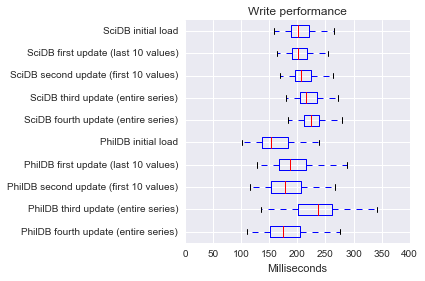

In [6]:
writes[write_labels[::-1]].boxplot(return_type = 'axes', vert = False)#rot = 90)
plt.title("Write performance")
#plt.yscale('log')
plt.xlim(0, 400)
plt.xlabel('Milliseconds')
plt.tight_layout()
plt.savefig('fig_write_boxplot.pdf')

/Users/amacdon/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:8: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


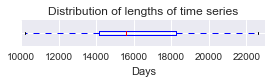

In [7]:
# CSV file produced with the following code:
# db = PhilDB('hrs_db')
# hrs = db.read_all('D')
# hrs.apply(lambda x: len(x[x.first_valid_index():x.last_valid_index()]))
hrs_lens = pd.DataFrame({"": pd.read_csv('hrs_lengths.csv', header=None)[1].values})

fig = plt.figure(figsize=(4,1))
hrs_lens.boxplot(vert = False, rot=90)

plt.xlim(10000, 23000)
plt.tight_layout(pad=1.5)
plt.title("Distribution of lengths of time series")
plt.xlabel('Days')
plt.savefig("fig_hrs_lengths.pdf")

In [8]:
def get_read_results(results_run, label_suffix = ''):
    read_labels = []
    read_results = {}
    labels = [
        'SciDB first read',
        'SciDB second read',
        'SciDB third read',
        'SciDB fourth read',
        'SciDB fifth read',

        'PhilDB first read',
        'PhilDB second read',
        'PhilDB third read',
        'PhilDB fourth read',
        'PhilDB fifth read',

        'PhilDB Server/Client first read',
        'PhilDB Server/Client second read',
        'PhilDB Server/Client third read',
        'PhilDB Server/Client fourth read',
        'PhilDB Server/Client fifth read',

        'SciDB first log read',
        'SciDB second log read',
        'SciDB third log read',
        'SciDB fourth log read',

        'PhilDB first log read',
        'PhilDB second log read',
        'PhilDB third log read',
        'PhilDB fourth log read'
    ]

    read_result_files = [
        np.loadtxt(os.path.join(results_run, 'scidb_initial_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'scidb_update1_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'scidb_update2_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'scidb_update3_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'scidb_update4_reads.txt')),

        np.loadtxt(os.path.join(results_run, 'phildb_initial_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'phildb_update1_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'phildb_update2_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'phildb_update3_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'phildb_update4_reads.txt')),

        np.loadtxt(os.path.join(results_run, 'phildb_client_initial_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'phildb_client_update1_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'phildb_client_update2_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'phildb_client_update3_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'phildb_client_update4_reads.txt')),

        np.loadtxt(os.path.join(results_run, 'scidb_log1_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'scidb_log2_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'scidb_log3_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'scidb_log4_reads.txt')),

        np.loadtxt(os.path.join(results_run, 'phildb_log1_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'phildb_log2_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'phildb_log3_reads.txt')),
        np.loadtxt(os.path.join(results_run, 'phildb_log4_reads.txt'))
    ]

    for db, rtimes in zip(labels, read_result_files):
        read_results[db] = rtimes
        
    read_labels += labels
    
    reads = pd.DataFrame(read_results) * 1000
    reads = reads[read_labels]

    return reads, read_labels

read_labels = {}
reads = {}
for run in ['A', 'B', 'C', 'D']:
    results_run = '{0}/{1}'.format(results_dir, run.lower())
    
    reads[run], read_labels[run] = get_read_results(results_run, label_suffix)

read_labels = read_labels[run]
reads_panel = pd.Panel(reads)

# Take the mean of each run
reads = reads_panel.mean(axis='items')

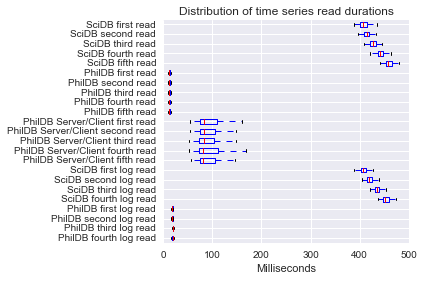

In [9]:
reads[read_labels[::-1]].boxplot(return_type='axes', vert=False)
plt.title("Distribution of time series read durations")
plt.xlabel('Milliseconds')
plt.xlim((0,500))
plt.tight_layout()
plt.savefig('fig_read_boxplot.pdf')
#plt.xscale('log')

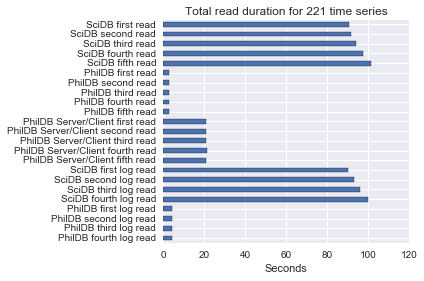

In [10]:
ax = (reads[read_labels[::-1]].sum() / 1000.0).plot(kind='barh', color = read_color)
plt.title("Total read duration for 221 time series")
plt.xlabel('Seconds')
#plt.xscale('log')
plt.tight_layout()
plt.savefig('fig_read_barh.pdf')

In [11]:
du_labels = [
    'SciDB disk usage',
    'PhilDB disk usage',
    'InfluxDB disk usage'
]

for f in ['scidb_disk_usage_results.txt', 'phildb_disk_usage_results.txt']:
    print('cut -d"\'" -f2 {0} | cut -d"\\\\" -f1 > clean_{0}'.format(f))

cut -d"'" -f2 scidb_disk_usage_results.txt | cut -d"\\" -f1 > clean_scidb_disk_usage_results.txt
cut -d"'" -f2 phildb_disk_usage_results.txt | cut -d"\\" -f1 > clean_phildb_disk_usage_results.txt


In [12]:
du = [
    np.loadtxt(os.path.join(results_run, 'clean_scidb_disk_usage_results.txt')),
    np.loadtxt(os.path.join(results_run, 'clean_phildb_disk_usage_results.txt'))
]

# After `sudo du -s /var/lib/influxdb/data/hrs_experiment` - before `sudo du -s /var/lib/influxdb/data/`
influx_du = [0, 365968 - 188] + [np.nan] * (len(du[0]) - 2)
du.append(influx_du)
 
du_results = {}
for db, du_size in zip(du_labels, du):
    du_results[db] = du_size
du_results = pd.DataFrame(du_results) / 1024.0

# Subtract initial size to get relative increases
du_results = du_results - du_results.iloc[0]
du_results.index = ['Zero', 'Initial', 'Update 1', 'Update 2', 'Update 3', 'Update 4']

/Users/amacdon/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


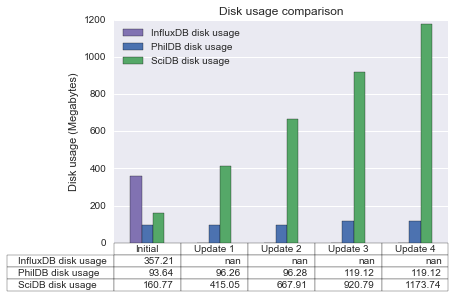

In [13]:
du_colors = [
    sns.color_palette()[3],
    sns.color_palette()[0],
    sns.color_palette()[1]
]
ax = du_results[1:].round(2).plot(kind = 'bar', table=True, color = du_colors)
ax.get_xaxis().set_visible(False)
plt.title("Disk usage comparison")
plt.ylabel('Disk usage (Megabytes)')
#plt.tight_layout(pad=6)
#plt.subplots_adjust(top=0.85)
plt.savefig('fig_du.pdf', bbox_inches='tight')

In [14]:
du_results

,InfluxDB disk usage,PhilDB disk usage,SciDB disk usage
Zero,0.000000,0.000000,0.000000
Initial,357.207031,93.644531,160.765625
Update 1,NaN,96.261719,415.050781
Update 2,NaN,96.277344,667.906250
Update 3,NaN,119.125000,920.792969
Update 4,NaN,119.125000,1173.738281


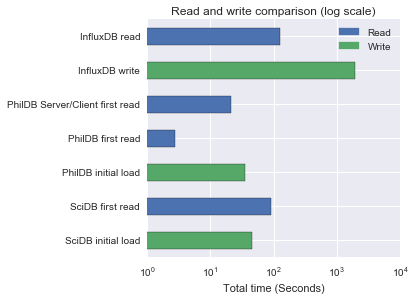

In [15]:
influx_writes = np.loadtxt(os.path.join(results_dir, 'influx_write_times.txt'))
influx_reads = np.loadtxt(os.path.join(results_dir, 'influxdb_reads.txt'))

read_write_colors = [
    write_color,
    read_color,
    write_color,
    read_color,
    read_color,
    write_color,
    read_color,
]

compare = pd.DataFrame(
    {
        'InfluxDB write': influx_writes,
        write_labels[0]: writes[write_labels[0]] / 1000.0,
        write_labels[5]: writes[write_labels[5]] / 1000.0,
        'InfluxDB read': influx_reads,
        read_labels[10]: reads[read_labels[10]] / 1000.0,
        read_labels[0]: reads[read_labels[0]] / 1000.0,
        read_labels[5]: reads[read_labels[5]] / 1000.0,
        
    }
)
compare[sorted(compare.columns, reverse = True)].sum().plot(kind='barh', color = read_write_colors)

plt.legend(
    handles = [
        mpatches.Patch(color=read_color, label='Read'),
        mpatches.Patch(color=write_color, label='Write'),
    ]
)

plt.xscale('log')
plt.tight_layout(pad=1.5)
plt.title('Read and write comparison (log scale)')
plt.xlabel('Total time (Seconds)')

plt.savefig('fig_initial_compare.pdf')

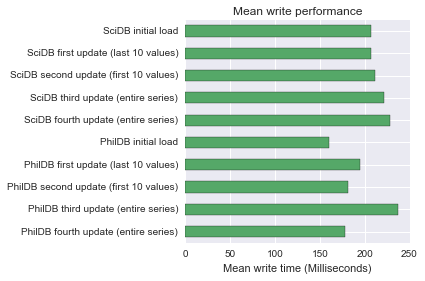

In [16]:
writes[write_labels[::-1]].mean().plot(kind='barh', color = write_color)
plt.title("Mean write performance")
#plt.xscale('log')
#plt.xlim((1, 1E4))
plt.xlabel("Mean write time (Milliseconds)")
plt.tight_layout()
plt.savefig('fig_mean_write_time.pdf')